<a href="https://colab.research.google.com/github/soukhind2/vgg16obj/blob/master/perf_increase_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

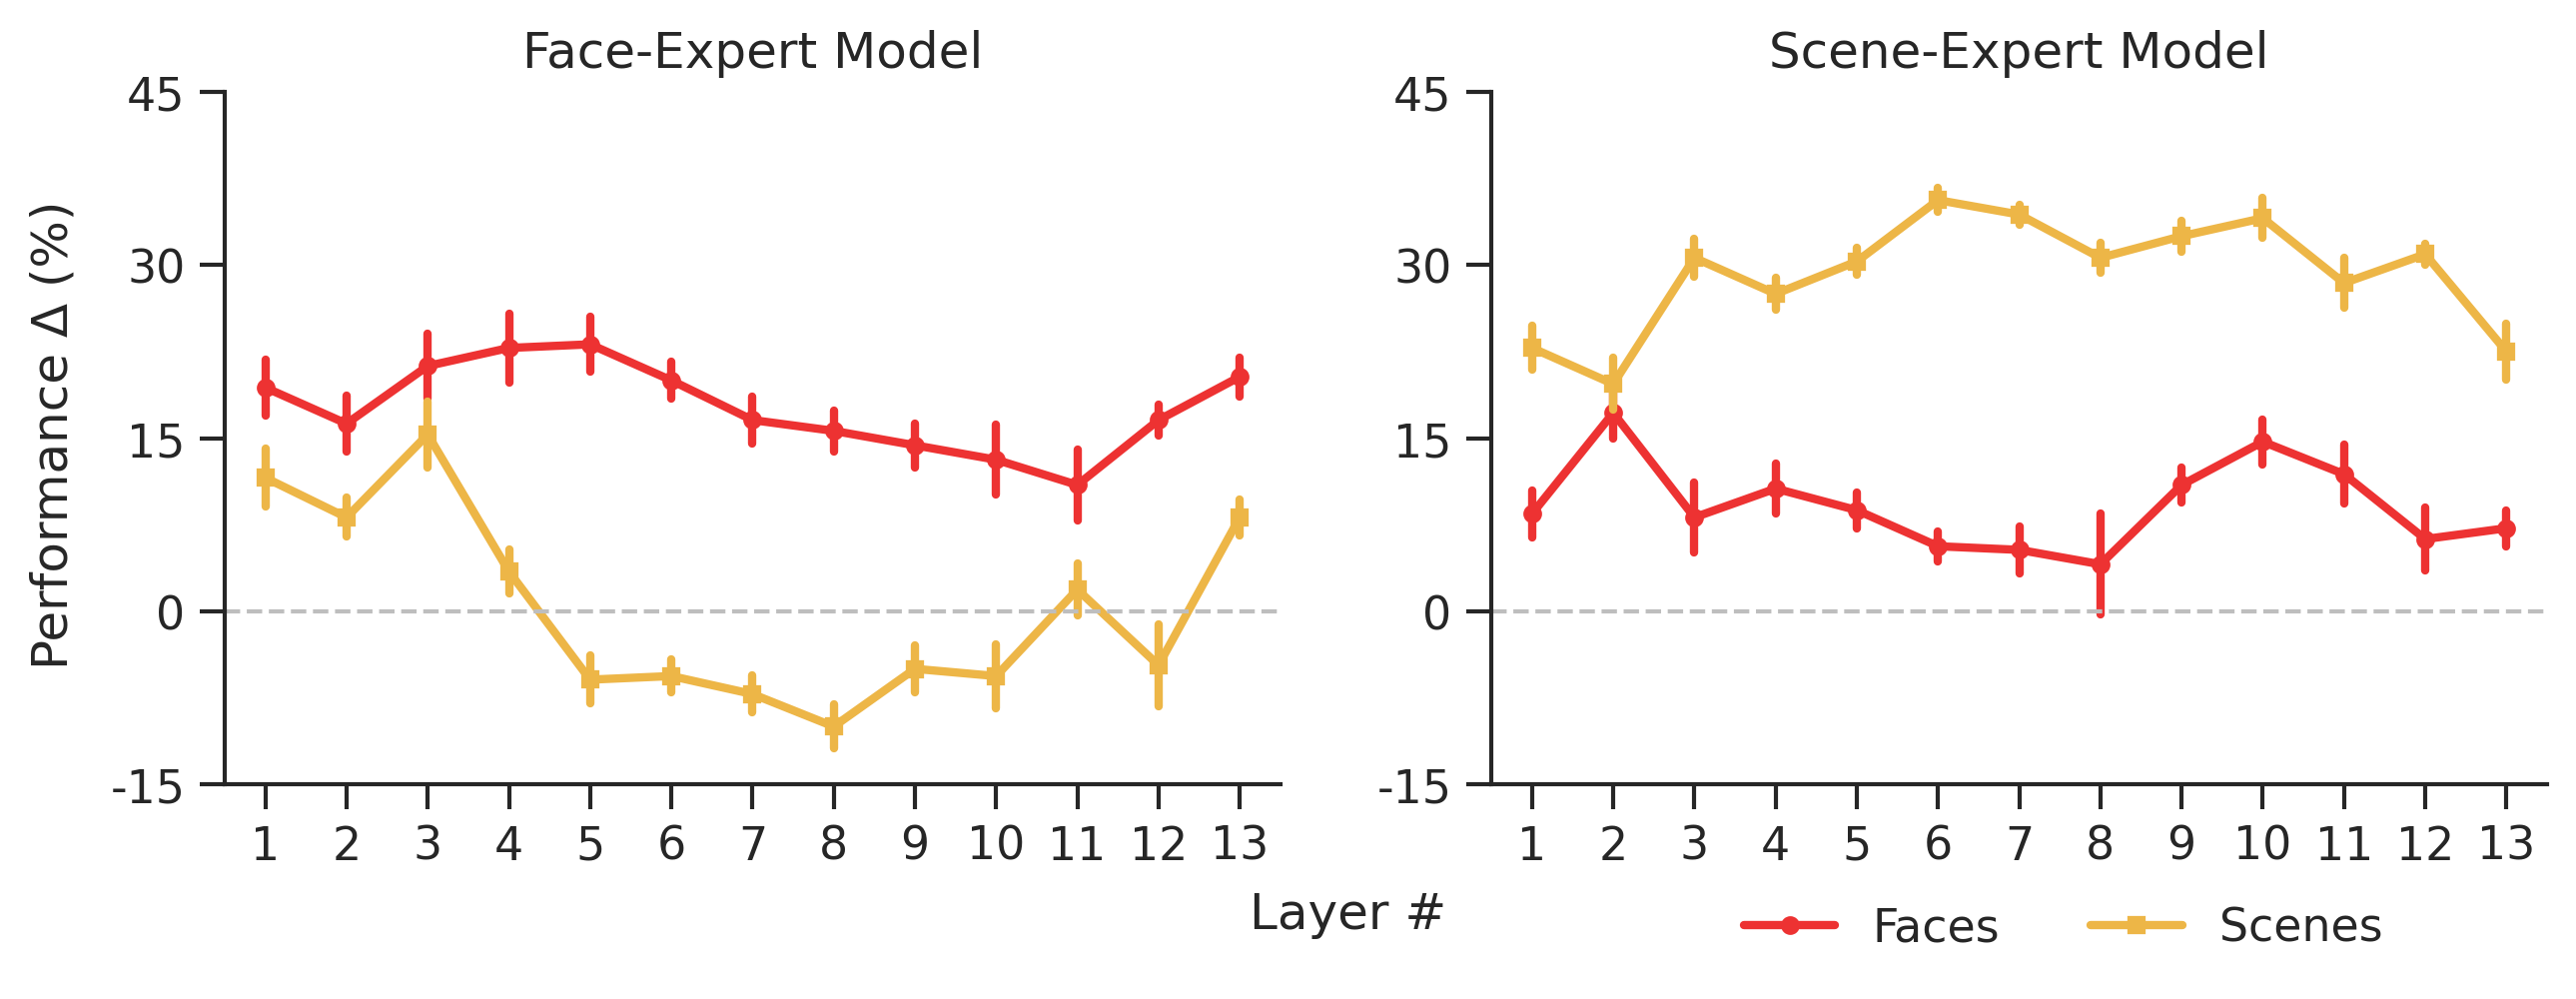

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
categories = ["Faces","Scenes"]
models = ['Face-Expert Model','Scene-Expert Model']


acc = [0.45,0.5,0.60,0.60 ]
gacc = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi1.npy')
y = np.expand_dims(gacc,0)

temp = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi2.npy')
y = np.concatenate((y,temp.reshape(1,4,13,5)))

y = np.amax(y,axis=0)
plt_data = np.zeros((4,13,5))
for i in range(13):
  for j in range(4):
    for k in range(5):
      plt_data[j,i,k] = y[j,i,k] - acc[j]

plt_data2 = [np.mean(plt_data[0:2,:,:],axis=0)] + [np.mean(plt_data[2:4,:,:],axis=0)]

acc = [0.60,0.60,0.50,0.50 ]
gacc = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi1.npy')
y = np.expand_dims(gacc,0)

for i in range(2,7):
  temp = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi' + str(i) + '.npy')
  y = np.concatenate((y,temp.reshape(1,4,13,5)))


y = np.amax(y,axis=0)
plt_data = np.zeros((4,13,5))
for i in range(13):
  for j in range(4):
    for k in range(5):
      plt_data[j,i,k] = y[j,i,k] - acc[j]

plt_data2 = plt_data2 + [np.mean(plt_data[0:2,:,:],axis=0)] + [np.mean(plt_data[2:4,:,:],axis=0)]
plt_data2 = iter(plt_data2)


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,3))
sns.set(style="white",rc={"lines.linewidth": 1})
sns.set(font_scale=1,style='ticks')
layer = 0
plt.rcParams['figure.dpi'] = 300
axes = axes.flatten()


for cats in [0,1]:
  colors = iter(["#ed3232","#edb647"])

  sns.pointplot(next(plt_data2).T,ax = axes[cats],
                errorbar = 'se',markersize = 3,
                linewidth = 2, markers = "o",color = next(colors),label = "Faces")

  sns.pointplot(next(plt_data2).T,ax = axes[cats],
                errorbar = 'se',markersize = 3,
                linewidth = 2, markers = "s",color = next(colors), label = "Scenes")
  axes[cats].axhline(0,color='#bebebe',linewidth = 1,linestyle = '--')
  #axes[cats].set_ylim(-0.1,0.4)
  axes[cats].set_yticks(np.arange(-0.15,0.50,0.15),["-15","0","15","30","45"])
  axes[cats].set_xticks(np.arange(0,13),["1","2","3","4","5","6","7","8","9","10","11","12","13"])
  axes[cats].set_title(models[cats])

  axes[cats].spines['right'].set_visible(False)
  axes[cats].spines['top'].set_visible(False)
  #axes[cats].spines['bottom'].set_visible(False)
  axes[cats].spines['left'].set_linewidth(1)
  axes[cats].spines['bottom'].set_linewidth(1)
  axes[cats].tick_params(width=1)

axes[1].legend(loc = 'lower left', bbox_to_anchor=(0.2, -0.3), ncol=2, frameon=False)

fig.text(0.5, -0.05, 'Layer #', ha='center')
fig.text(0.06, 0.5, 'Performance Δ (%)', va='center', rotation='vertical')

plt.savefig('combined_perf_increase.png',bbox_inches='tight')  # saves the current figure
plt.savefig('combined_perf_increase.jpeg',bbox_inches='tight')  # saves the current figure

In [13]:

acc = [0.45,0.5,0.60,0.60 ]
gacc = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi1.npy')
y = np.expand_dims(gacc,0)

temp = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi2.npy')
y = np.concatenate((y,temp.reshape(1,4,13,5)))

y = np.amax(y,axis=0)
plt_data = np.zeros((4,13,5))
for i in range(13):
  for j in range(4):
    for k in range(5):
      plt_data[j,i,k] = y[j,i,k] - acc[j]

plt_data2 = [np.mean(plt_data[0:2,:,:],axis=0)] + [np.mean(plt_data[2:4,:,:],axis=0)]

acc = [0.60,0.60,0.50,0.50 ]
gacc = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi1.npy')
y = np.expand_dims(gacc,0)

for i in range(2,7):
  temp = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi' + str(i) + '.npy')
  y = np.concatenate((y,temp.reshape(1,4,13,5)))


y = np.amax(y,axis=0)
plt_data = np.zeros((4,13,5))
for i in range(13):
  for j in range(4):
    for k in range(5):
      plt_data[j,i,k] = y[j,i,k] - acc[j]

plt_data2 = plt_data2 + [np.mean(plt_data[0:2,:,:],axis=0)] + [np.mean(plt_data[2:4,:,:],axis=0)]

In [69]:
x = np.array(plt_data2)


In [92]:
# prompt: Run 2 way ANOVA on variable x with the first and second dimensions as factors. In the first dimension, dummy code as 0 1 0 1
layer = []
for i in range(4):
  for l in range(13):
    layer.append([l]*5)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a data frame
df = pd.DataFrame({'x': x.flatten(),
                   'layer': np.array(layer).flatten(),
                   'image': np.concatenate((np.zeros(65), np.ones(65),np.zeros(65), np.ones(65))),
                   'model': np.concatenate((np.zeros(130), np.ones(130)))})

# Fit the two-way ANOVA model
model = ols('x ~ C(layer) + C(image) + C(model) + C(layer):C(model) + C(image):C(model)', data=df).fit()

# Print the ANOVA table
print(sm.stats.anova_lm(model, typ=2))


                     sum_sq     df           F        PR(>F)
C(layer)           0.108998   12.0    2.536765  3.666306e-03
C(image)           0.011779    1.0    3.289634  7.101052e-02
C(model)           0.672059    1.0  187.694834  1.065393e-31
C(layer):C(model)  0.268786   12.0    6.255612  1.501669e-09
C(image):C(model)  2.279301    1.0  636.570488  1.908762e-68
Residual           0.830698  232.0         NaN           NaN
